In [46]:
# Импортируем библиотеки

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions

Для лабораторной работы по визуализации взят набор данных "Glioma Grading Clinical and Mutation Features".

Набор был создан с целью анализа глиомы. Глиомы являются наиболее распространенными первичными опухолями головного мозга. Они могут быть классифицированы как LGG (глиома низкой степени злокачественности) или GBM (глиобластома мультиформная) в зависимости от гистологических/визуализационных критериев. Клинические и молекулярные/мутационные факторы также очень важны для процесса классификации. Молекулярные тесты являются дорогостоящими для точной диагностики пациентов с глиомой. В этом наборе данных рассматриваются наиболее часто мутирующие 20 генов и 3 клинических признака из проектов глиомы мозга TCGA-LGG и TCGA-GBM. Задача прогнозирования заключается в том, чтобы определить, является ли пациент LGG или GBM с заданными клиническими и молекулярными/мутационными признаками. Основная цель заключается в том, чтобы найти оптимальный подмножество генов мутаций и клинических признаков для процесса классификации глиомы, чтобы улучшить производительность и сократить расходы.

# Загрузка данных из github

In [16]:
# Присвоим переменной «url» ссылку на датасет:

url = 'https://raw.githubusercontent.com/KoJl9lH-59rus/TMO_LAB_LYGAEV/refs/heads/main/%D0%9A%D0%A21/content/TCGA_InfoWithGrade.csv'

# используем Pandas read_csv():

dataset = pd.read_csv(url)

dataset['Age_at_diagnosis'] = dataset['Age_at_diagnosis'].round(0)

In [17]:
dataset.head()

,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,0,0,51.0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,39.0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,35.0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,33.0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,32.0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0



1. **Grade:** Степень злокачественности глиомы
2. **Gender:** Пол (0 = "мужской"; 1 = "женский")
3. **Age_at_diagnosis:** Возраст на момент постановки диагноза
4. **Race:** Раса (0 = «белый»; 1 = «черный или афроамериканец»; 2 = «азиат»; 3 = «американский индеец или коренной житель Аляски»)

Далее идут вещества взятые на анализ у больных (20 генов), где 0 = нет мутации; 1 = есть мутации
5. Изоцитратдегидрогеназа 1
6. Опухолевый белок p53
7. Ремоделер хроматина
8. Гомолог фосфатазы и тензина
9. Рецептор эпидермального фактора роста
10. Транскрипционный репрессор capicua
11. Муцин 16, связанный с клеточной поверхностью
12. Фосфатидилинозитол-4,5-бисфосфат 3-киназы каталитическая субъединица альфа
13. Нейрофибромин 1
14. Регуляторная субъединица 1 фосфоинозитид-3-киназы
15. Белок связывания дальнего элемента выше по течению 1
16. Транскрипционный корепрессор RB 1
17. Рецептор notch 1
18. Корепрессор BCL6
19. CUB и Sushi множественные домены 3
20. SWI/SNF-связанный, связанный с матриксом, зависимый от актина регулятор хроматина, подсемейство a, член 4
21. Субъединица 2A ионотропного рецептора глутамата типа NMDA
22. Изоцитратдегидрогеназа 2
23. FAT атипичный кадгерин
24. Рецептор тромбоцитарного фактора роста альфа
---



In [18]:
import mpl_toolkits.mplot3d  # noqa: F401


from sklearn import datasets
from sklearn.cluster import KMeans

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839 entries, 0 to 838
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Grade             839 non-null    int64  
 1   Gender            839 non-null    int64  
 2   Age_at_diagnosis  839 non-null    float64
 3   Race              839 non-null    int64  
 4   IDH1              839 non-null    int64  
 5   TP53              839 non-null    int64  
 6   ATRX              839 non-null    int64  
 7   PTEN              839 non-null    int64  
 8   EGFR              839 non-null    int64  
 9   CIC               839 non-null    int64  
 10  MUC16             839 non-null    int64  
 11  PIK3CA            839 non-null    int64  
 12  NF1               839 non-null    int64  
 13  PIK3R1            839 non-null    int64  
 14  FUBP1             839 non-null    int64  
 15  RB1               839 non-null    int64  
 16  NOTCH1            839 non-null    int64  
 1

Категории Gender и WorkoutType

In [20]:
dataset.describe()

,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
count,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,...,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000
mean,0.419547,0.418355,50.936830,0.107271,0.481526,0.414779,0.258641,0.168057,0.133492,0.132300,...,0.053635,0.047676,0.045292,0.034565,0.032181,0.032181,0.032181,0.027414,0.027414,0.026222
std,0.493779,0.493583,15.708398,0.369392,0.499957,0.492978,0.438149,0.374140,0.340309,0.339019,...,0.225431,0.213206,0.208068,0.182784,0.176586,0.176586,0.176586,0.163383,0.163383,0.159889
min,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,52.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,63.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,89.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Категориальных данных нет

In [21]:
dataset.head()

,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,0,0,51.0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,39.0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,35.0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,33.0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,32.0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Построение модели

## Разделение набора данных

Y  - целевая переменная, которую предсказываем. Мы ищем зависимость этой переменной от соответствующих фич.  В нашем случае это столбец Grade.

В X складываем весь набор данных без целевой переменной.

In [26]:
X = dataset.drop(['Grade'], axis=1)
y = dataset['Grade']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (839, 23) | y shape: (839,) 



## Train Test разделение

Разделяем наш набор данных на обучающий (train) и тестовый (test) с помощью train_test_split(), мы берем 80% данных для обучения нашей модели и 20% оставляем в качестве проверочного набора данных:

In [30]:
import scipy.stats as stats

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=15, stratify=y)
stats.ttest_ind (a=y_train, b=y_test)

TtestResult(statistic=0.08449653531347652, pvalue=0.9326818628172217, df=837.0)

## Обучение и выбор оптимальной модели

Далее попробуем следующие алгоритмы:

Logistic Regression (LR) </br>
Linear Discriminant Analysis (LDA)</br>
K-Nearest Neighbors (KNN)</br>
Classification and Regression Trees (CART)</br>
Gaussian Naive Bayes (NB)</br>
Support Vector Machines (SVM)</br>

In [33]:
# создаем лист для тех моделей, которые будем изучать
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))

# оцениваем их метрики
results = []
model_names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  model_names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.873376 (0.035857)
LDA: 0.867428 (0.037114)
KNN: 0.798815 (0.054295)
CART: 0.791330 (0.071644)
NB: 0.824122 (0.048567)
SVC: 0.830158 (0.061786)


Logistic Regression показал лучшие метрики среди всех алгоритмов. Далее работаем с Logistic Regression (LR).

## Обучение конкретной модели
Определяем нашу модель LR
После этого подгоняем/обучаем модель на X_train и Y_train с помощью метода .fit().
Затем мы делаем прогноз на X_test с помощью метода .predict().

In [45]:
LR = LogisticRegression(solver='lbfgs', max_iter=1000)
LR.fit(X_train, y_train)
LR_pred_res = LR.predict(X_test)
LR_accuracy = accuracy_score(y_test, LR_pred_res)

print(f'LR accuracy: {LR_accuracy}')
print(f'LR prediction: {LR_pred_res}')

LR accuracy: 0.8690476190476191
LR prediction: [0 1 0 1 0 1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0
 1 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1
 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1 0]


<Axes: title={'center': 'LR surface with original features'}>

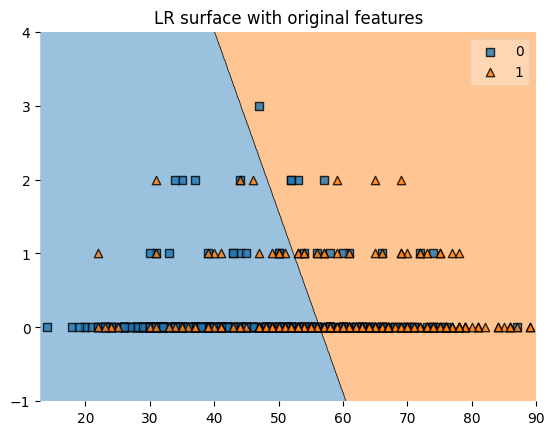

In [68]:
y_s = y_train
X_2d= X_train[['Age_at_diagnosis', 'Race']].values
y_2d = y_s.values

LR1 = LogisticRegression(solver='lbfgs', max_iter=1000)
LR1.fit(X_2d, y_2d)

plt.title('LR surface with original features')
plot_decision_regions(
    	X=X_2d,
    	y=y_2d,
    	clf=LR1)